In [25]:
from utils import read_test_case1_from_txt
from itertools import combinations

k,adj_matrix = read_test_case1_from_txt("./Testcase_Q1.txt")

In [26]:
# Q1 using vertex cover

def is_vertex_cover(adj_matrix, W):
    num_vertices = len(adj_matrix)
    for i in range(num_vertices):
        for j in range(num_vertices):
            if adj_matrix[i][j] == 1 and i not in W and j not in W:
                return False
    return True


num_vertices = len(adj_matrix)

# Generate combinations within the size limit 'k'
valid_vertex_covers = []
for r in range(1, k + 1):
    possible_W = combinations(range(num_vertices), r)
    for W in possible_W:
        if is_vertex_cover(adj_matrix, W):
            valid_vertex_covers.append(W)

# Output valid vertex covers within size limit 'k'
if valid_vertex_covers:
    print("Yes")
    for cover in valid_vertex_covers:
        print(' '.join(str(vertex + 1) for vertex in cover))
else:
    print("No")

Yes
1 2 4
2 3 5
3 4 5


In [27]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

def is_vertex_cover(adj_matrix, W):
    num_vertices = len(adj_matrix)
    for i in range(num_vertices):
        for j in range(num_vertices):
            if adj_matrix[i][j] == 1 and i not in W and j not in W:
                return False
    return True

def create_graph(adj_matrix):
    G = nx.Graph()
    n = len(adj_matrix)
    for i in range(n):
        for j in range(i + 1, n):
            if adj_matrix[i][j] == 1:
                G.add_edge(i, j)
    return G

def plot_graph(G, vertex_cover, title):
    colors = ['lightblue' if node in vertex_cover else 'gray' for node in G.nodes()]
    pos = nx.circular_layout(G)
    nx.draw(G,pos, with_labels=True, node_color=colors)

    # Add a legend
    lightblue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Vertex Cover',
                                  markersize=10, markerfacecolor='lightblue')
    plt.legend(handles=[lightblue_patch])
    plt.title(title)
    plt.show()

def find_and_visualize_vertex_covers(adj_matrix, k):
    num_vertices = len(adj_matrix)
    G = create_graph(adj_matrix)
    cover_count = 0

    # Generate combinations within the size limit 'k'
    for r in range(1, k + 1):
        for W in itertools.combinations(range(num_vertices), r):
            if is_vertex_cover(adj_matrix, set(W)):
                plot_graph(G, set(W), f"Vertex Cover #{cover_count+1} with size {r}")
                cover_count += 1

    if cover_count == 0:
        print("No vertex cover found within size limit.")

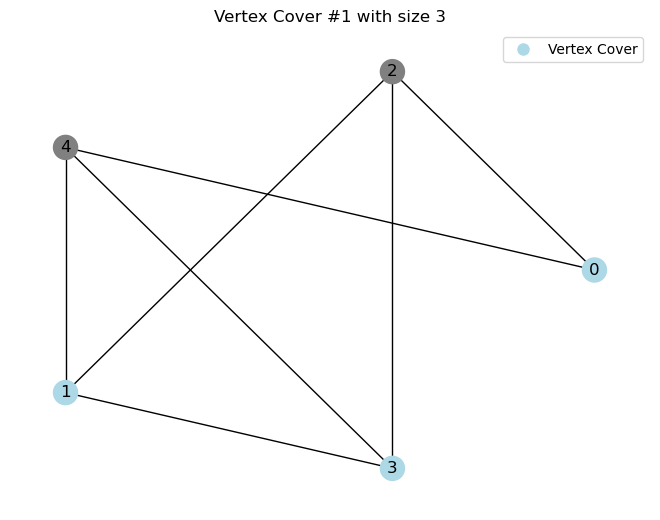

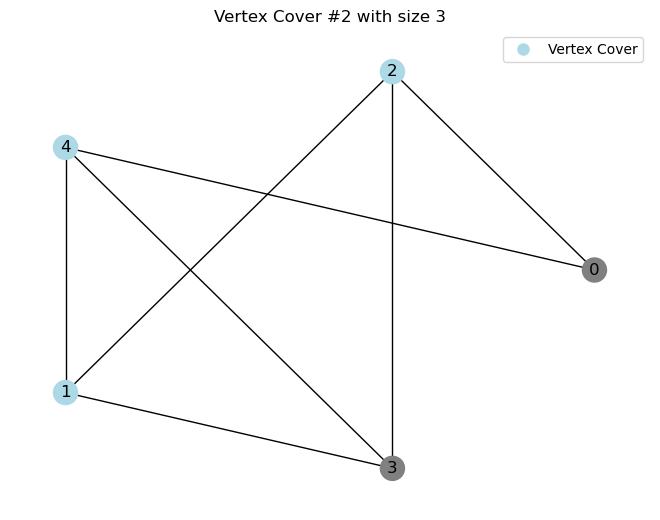

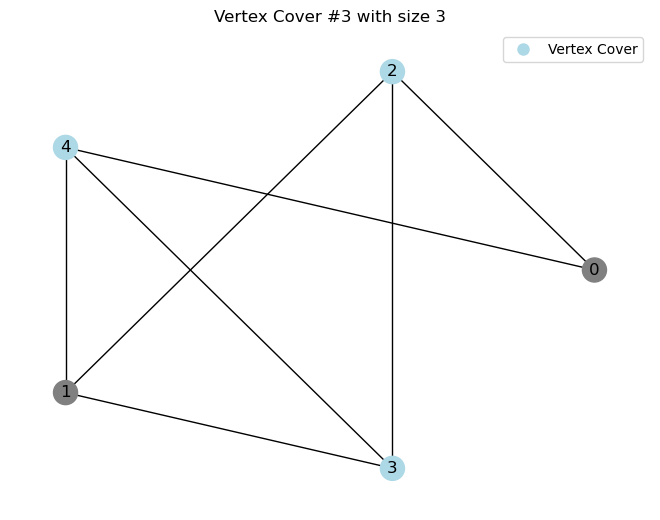

In [28]:
find_and_visualize_vertex_covers(adj_matrix, k)